## Kütüphaneler

In [213]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Veri Yükleme

In [214]:
data = pd.read_csv("wine-clustering.csv")


## Veriyi Standartlaştırma

In [215]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


## PCA ile Boyut Azaltma

In [216]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)


## En İyi eps ve MinPts Seçiminin Yapılması

In [229]:
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
minPts_values = [5, 10, 15, 20]

best_eps = None
best_minPts = None
best_num_clusters = 0

for eps in eps_values:
	for minPts in minPts_values:
		dbscan = DBSCAN(eps=eps, min_samples=minPts)
		clusters = dbscan.fit_predict(reduced_data)
		num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)  # -1, gürültüyü temsil eder

		if num_clusters > best_num_clusters:
			best_num_clusters = num_clusters
			best_eps = eps
			best_minPts = minPts

print(f"En iyi eps değeri: {best_eps}")
print(f"En iyi minPts değeri: {best_minPts}")


En iyi eps değeri: 0.4
En iyi minPts değeri: 5


## DBSCAN'i En İyi Parametreler ile Çalıştırma

In [218]:
best_dbscan = DBSCAN(eps=best_eps, min_samples=best_minPts)
best_clusters = best_dbscan.fit_predict(reduced_data)


## Görselleştirme

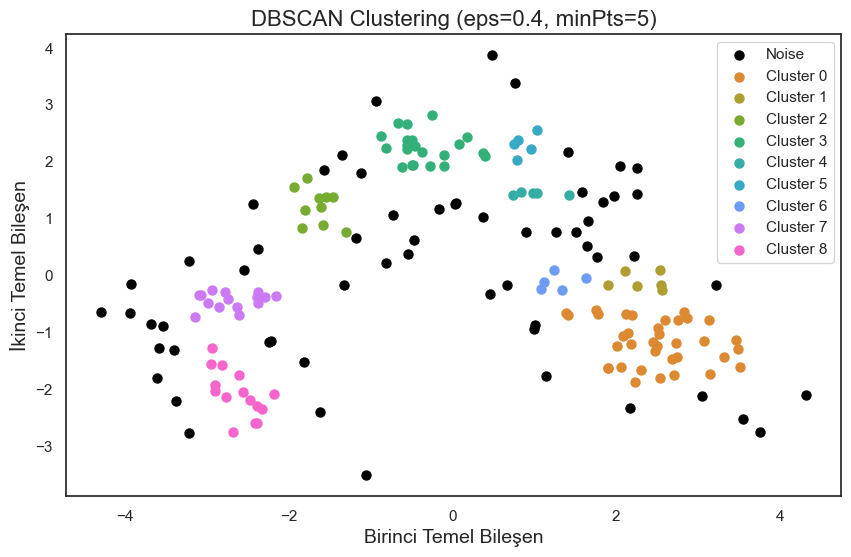

In [219]:
cluster_labels = np.unique(best_clusters)
colors = sns.color_palette("husl", len(cluster_labels))

# Kümeleme sonuçlarını daha iyi görselleştirin
sns.set(style="white")
plt.figure(figsize=(10, 6))
for i, label in enumerate(cluster_labels):
    if label == -1:
        plt.scatter(reduced_data[best_clusters == label, 0], reduced_data[best_clusters == label, 1],
                    c='black', s=42, label='Noise')
    else:
        plt.scatter(reduced_data[best_clusters == label, 0], reduced_data[best_clusters == label, 1],
                    c=[colors[i]], s=42, label=f'Cluster {label}')

plt.title(f'DBSCAN Clustering (eps={best_eps}, minPts={best_minPts})', fontsize=16)
plt.xlabel('Birinci Temel Bileşen', fontsize=14)
plt.ylabel('İkinci Temel Bileşen', fontsize=14)
plt.legend()
plt.show()


In [228]:
silhouette_avg = metrics.silhouette_score(reduced_data, clusters)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.3648044428386791
